In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

job = pd.read_csv('/Users/macbookair/Desktop/project/Resume_Analyser/resume-job-matching/data/Preprocessed/Cleaned_job.csv')
resume = pd.read_csv('/Users/macbookair/Desktop/project/Resume_Analyser/resume-job-matching/data/Preprocessed/Cleaned_resume.csv')

In [2]:
pd.set_option('max_colwidth', 800)

In [3]:
resume.head()

,Category,cleaned_resume,LabelEncoding
0,Data Science,skills programming languages python pandas numpy scipy scikitlearn matplotlib sql java javascriptjquery machine learning regression svm nave bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d3js dcjs plotly kibana matplotlib ggplot tableau others regular expression html css angular 6 logstash kafka python flask git docker computer vision open cv and understanding of deep learningeducation details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience 24 months jquery exprience 24 months python exprience 2...,6
1,Data Science,education details may 2013 to may 2017 be uitrgpv data scientist data scientist matelabs skill details python exprience less than 1 year months statsmodels exprience 12 months aws exprience less than 1 year months machine learning exprience less than 1 year months sklearn exprience less than 1 year months scipy exprience less than 1 year months keras exprience less than 1 year monthscompany details company matelabs description ml platform for business professionals dummies and enthusiasts 60a koramangala 5th block achievementstasks behind sukh sagar bengaluru india developed and deployed auto preprocessing steps of machine learning mainly missing value treatment outlier detection encoding scaling feature selection and dimensionality reduction deployed automated classification and regre...,6
2,Data Science,areas of interest deep learning control system design programming inpython electric machinery web development analytics technical activities q hindustan aeronautics limited bangalore for 4 weeks under the guidance of mr satish senior engineer in the hangar of mirage 2000 fighter aircraft technical skills programming matlab python and java labview python webframeworkdjango flask ltspiceintermediate languages and and mipowerintermediate github gitbash jupyter notebook xampp mysqlbasics python software packages interpretersanaconda python2 python3 pycharm java ideeclipse operating systems windows ubuntu debiankali linux education details january 2019 btech electrical and electronics engineering manipal institute of technology january 2015 deeksha center january 2013 little flower public s...,6
3,Data Science,skills r python sap hana tableau sap hana sql sap hana pal ms sql sap lumira c linear programming data modelling advance analytics scm analytics retail analytics social media analytics nlp education details january 2017 to january 2018 pgdm business analytics great lakes institute of management illinois institute of technology january 2013 bachelor of engineering electronics and communication bengaluru karnataka new horizon college of engineering bangalore visvesvaraya technological university data science consultant consultant deloitte usi skill details linear programming exprience 6 months retail exprience 6 months retail marketing exprience 6 months scm exprience 6 months sql exprience less than 1 year months deep learning exprience less than 1 year months machine learning exprience...,6
4,Data Science,education details mca ymcaust faridabad haryana data science internship skill details data structure exprience less than 1 year months c exprience less than 1 year months data analysis exprience less than 1 year months python exprience less than 1 year months core java exprience less than 1 year months database management exprience less than 1 year monthscompany details company itechpower description,6


In [4]:
job.head()

,Job_title,cleaned_job,LabelEncoding
0,Flutter Developer,we are looking for hire experts flutter developer so you are eligible this post then apply your resume job types fulltime parttime salary 2000000 4000000 per month benefits flexible schedule food allowance schedule day shift supplemental pay joining bonus overtime pay experience total work 1 year preferred housing rent subsidy yes industry software development work remotely temporarily due to covid19,4
1,Django Developer,pythondjango developerlead job codepdj 04 strong python experience in api development restrpc experience working with api frameworks djangoflask experience evaluating and improving the efficiency of programs in a linux environment ability to effectively handle multiple tasks with a high level of accuracy and attention to detail good verbal and written communication skills working knowledge of sql json experience preferred good knowledge in automated unit testing using pyunit,3
2,Machine Learning,data scientist contractor bangalore in responsibilities we are looking for a capable data scientist to join the analytics team reporting locally in india bangalore this persons responsibilities include research design and development of machine learning and deep learning algorithms to tackle a variety of fraud oriented challenges the data scientist will work closely with software engineers and program managers to deliver endtoend products including data collection in big scale and analysis exploring different algorithmic approaches model development assessment and validation all the way through production qualifications at least 3 years of handson development of complex machine learning models using modern frameworks and tools ideally python based solid understanding of statistics and ...,8
3,iOS Developer,job description strong framework outside of ios is always a plus ios experience and generalist engineers with backgrounds in related technologies is a plus a disciplined approach to development documentation and file structure strong visual design sense and excellent taste a constant desire to improve learn more and take things higher an excellent understanding of networking mobile network issues concurrency and threading experience working with internationalized apps responsibilities design and build advanced applications for the ios platform collaborate with crossfunctional teams to define design and ship new features work on bug fixing and improving application performance continuously discover evaluate and implement new technologies to maximize development efficiency have published...,14
4,Full Stack Developer,job responsibility full stack engineer react role make impact petsmart transforming engineering team meet need rapidly changing retail environment role foundational helping build craft petsmart prowess making react j native key framework across mobile web property working across web mobile application part building amazing mobile first customer experience impact customer store digital channel goal responsibility include act full stack developer across petsmart various web mobile solution full stack engineer help build petsmart competency using react j native across mobile web property partner web engineering team strategy share component across application best practice new advancement react community work product ux team review design concept offer suggestion decrease complexity maint...,5


### Resume

In [5]:
import nltk
#nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from nltk import word_tokenize
len(stopwords.words('english'))

179

In [6]:
#Create a list to store the word in cleaned resume
resumes = ""

for resume in resume['cleaned_resume']:
    resumes += resume

In [7]:
len(resumes)

2795759

In [8]:
resume_tokens = word_tokenize(resumes)

In [9]:
resume_tokens

['skills',
 'programming',
 'languages',
 'python',
 'pandas',
 'numpy',
 'scipy',
 'scikitlearn',
 'matplotlib',
 'sql',
 'java',
 'javascriptjquery',
 'machine',
 'learning',
 'regression',
 'svm',
 'nave',
 'bayes',
 'knn',
 'random',
 'forest',
 'decision',
 'trees',
 'boosting',
 'techniques',
 'cluster',
 'analysis',
 'word',
 'embedding',
 'sentiment',
 'analysis',
 'natural',
 'language',
 'processing',
 'dimensionality',
 'reduction',
 'topic',
 'modelling',
 'lda',
 'nmf',
 'pca',
 'neural',
 'nets',
 'database',
 'visualizations',
 'mysql',
 'sqlserver',
 'cassandra',
 'hbase',
 'elasticsearch',
 'd3js',
 'dcjs',
 'plotly',
 'kibana',
 'matplotlib',
 'ggplot',
 'tableau',
 'others',
 'regular',
 'expression',
 'html',
 'css',
 'angular',
 '6',
 'logstash',
 'kafka',
 'python',
 'flask',
 'git',
 'docker',
 'computer',
 'vision',
 'open',
 'cv',
 'and',
 'understanding',
 'of',
 'deep',
 'learningeducation',
 'details',
 'data',
 'science',
 'assurance',
 'associate',
 'data'

In [10]:
print( "There are ", len(resume_tokens), "token in the resume.")

There are  399484 token in the resume.


In [11]:
#after tokenize the string, then we can apply the stopword removal step

In [12]:
#Remove stop word
DOMAIN_SPECIFIC_STOPWORDS = ['resume', 'job', 'candidate', 'apply', 'experience', 'skills']

stop_words = set(stopwords.words('english')).union(DOMAIN_SPECIFIC_STOPWORDS)

resume_tokens = [word for word in resume_tokens if word not in stop_words]

In [13]:
len(stop_words)

185

In [14]:
# Resume_tokens after remove stop words
resume_tokens[:10]

['programming',
 'languages',
 'python',
 'pandas',
 'numpy',
 'scipy',
 'scikitlearn',
 'matplotlib',
 'sql',
 'java']

In [15]:
print("After remove the stop words from the tokens of the resume, it remains only ", len(resume_tokens), "in our list.")

After remove the stop words from the tokens of the resume, it remains only  308064 in our list.


In [16]:
print("Experience in tokens:", 'experience' in resume_tokens)

Experience in tokens: False


In [17]:
print("C++ in tokens:", 'c++' in resume_tokens)

C++ in tokens: True


In [18]:
! pip install WordCloud

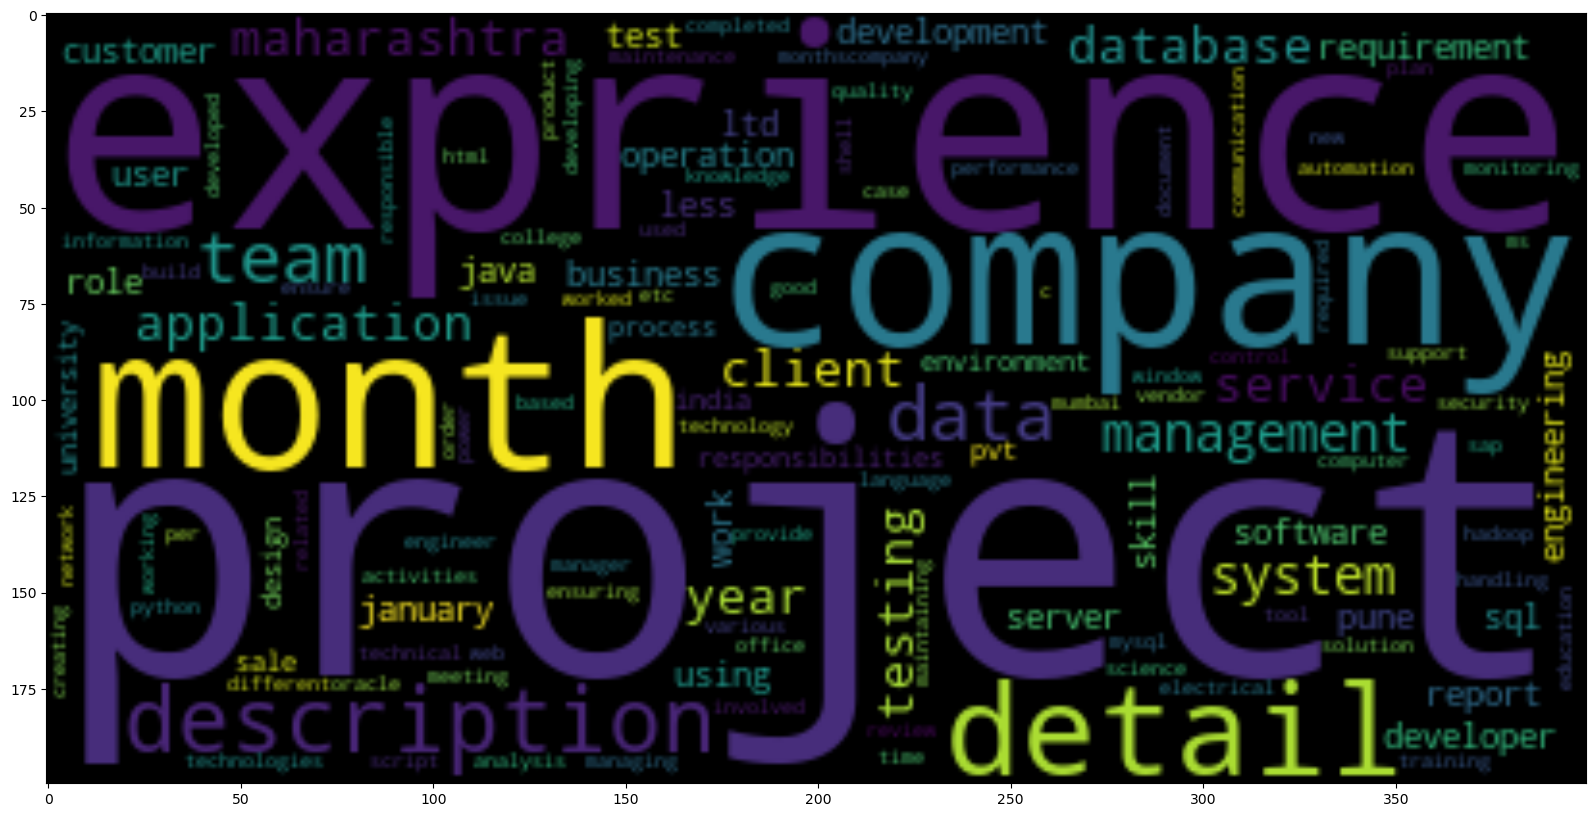

In [19]:
from wordcloud import WordCloud
wordcloudimage = WordCloud( font_step=2 ,
max_font_size=500,
collocations = False,

collocation_threshold = 1
).generate(" ".join(resume_tokens))
plt.figure(figsize=(25, 10))
plt.imshow(wordcloudimage, interpolation='bilinear')
# plt.axis("off")
plt.show()

As we can see, we already remove the word 'experience' from our tokens but it still appear in the image. The reason is because it is incorrect spelling 'exprience'.

In [20]:
type(resume_tokens)

list

In [21]:
type(resumes)

str

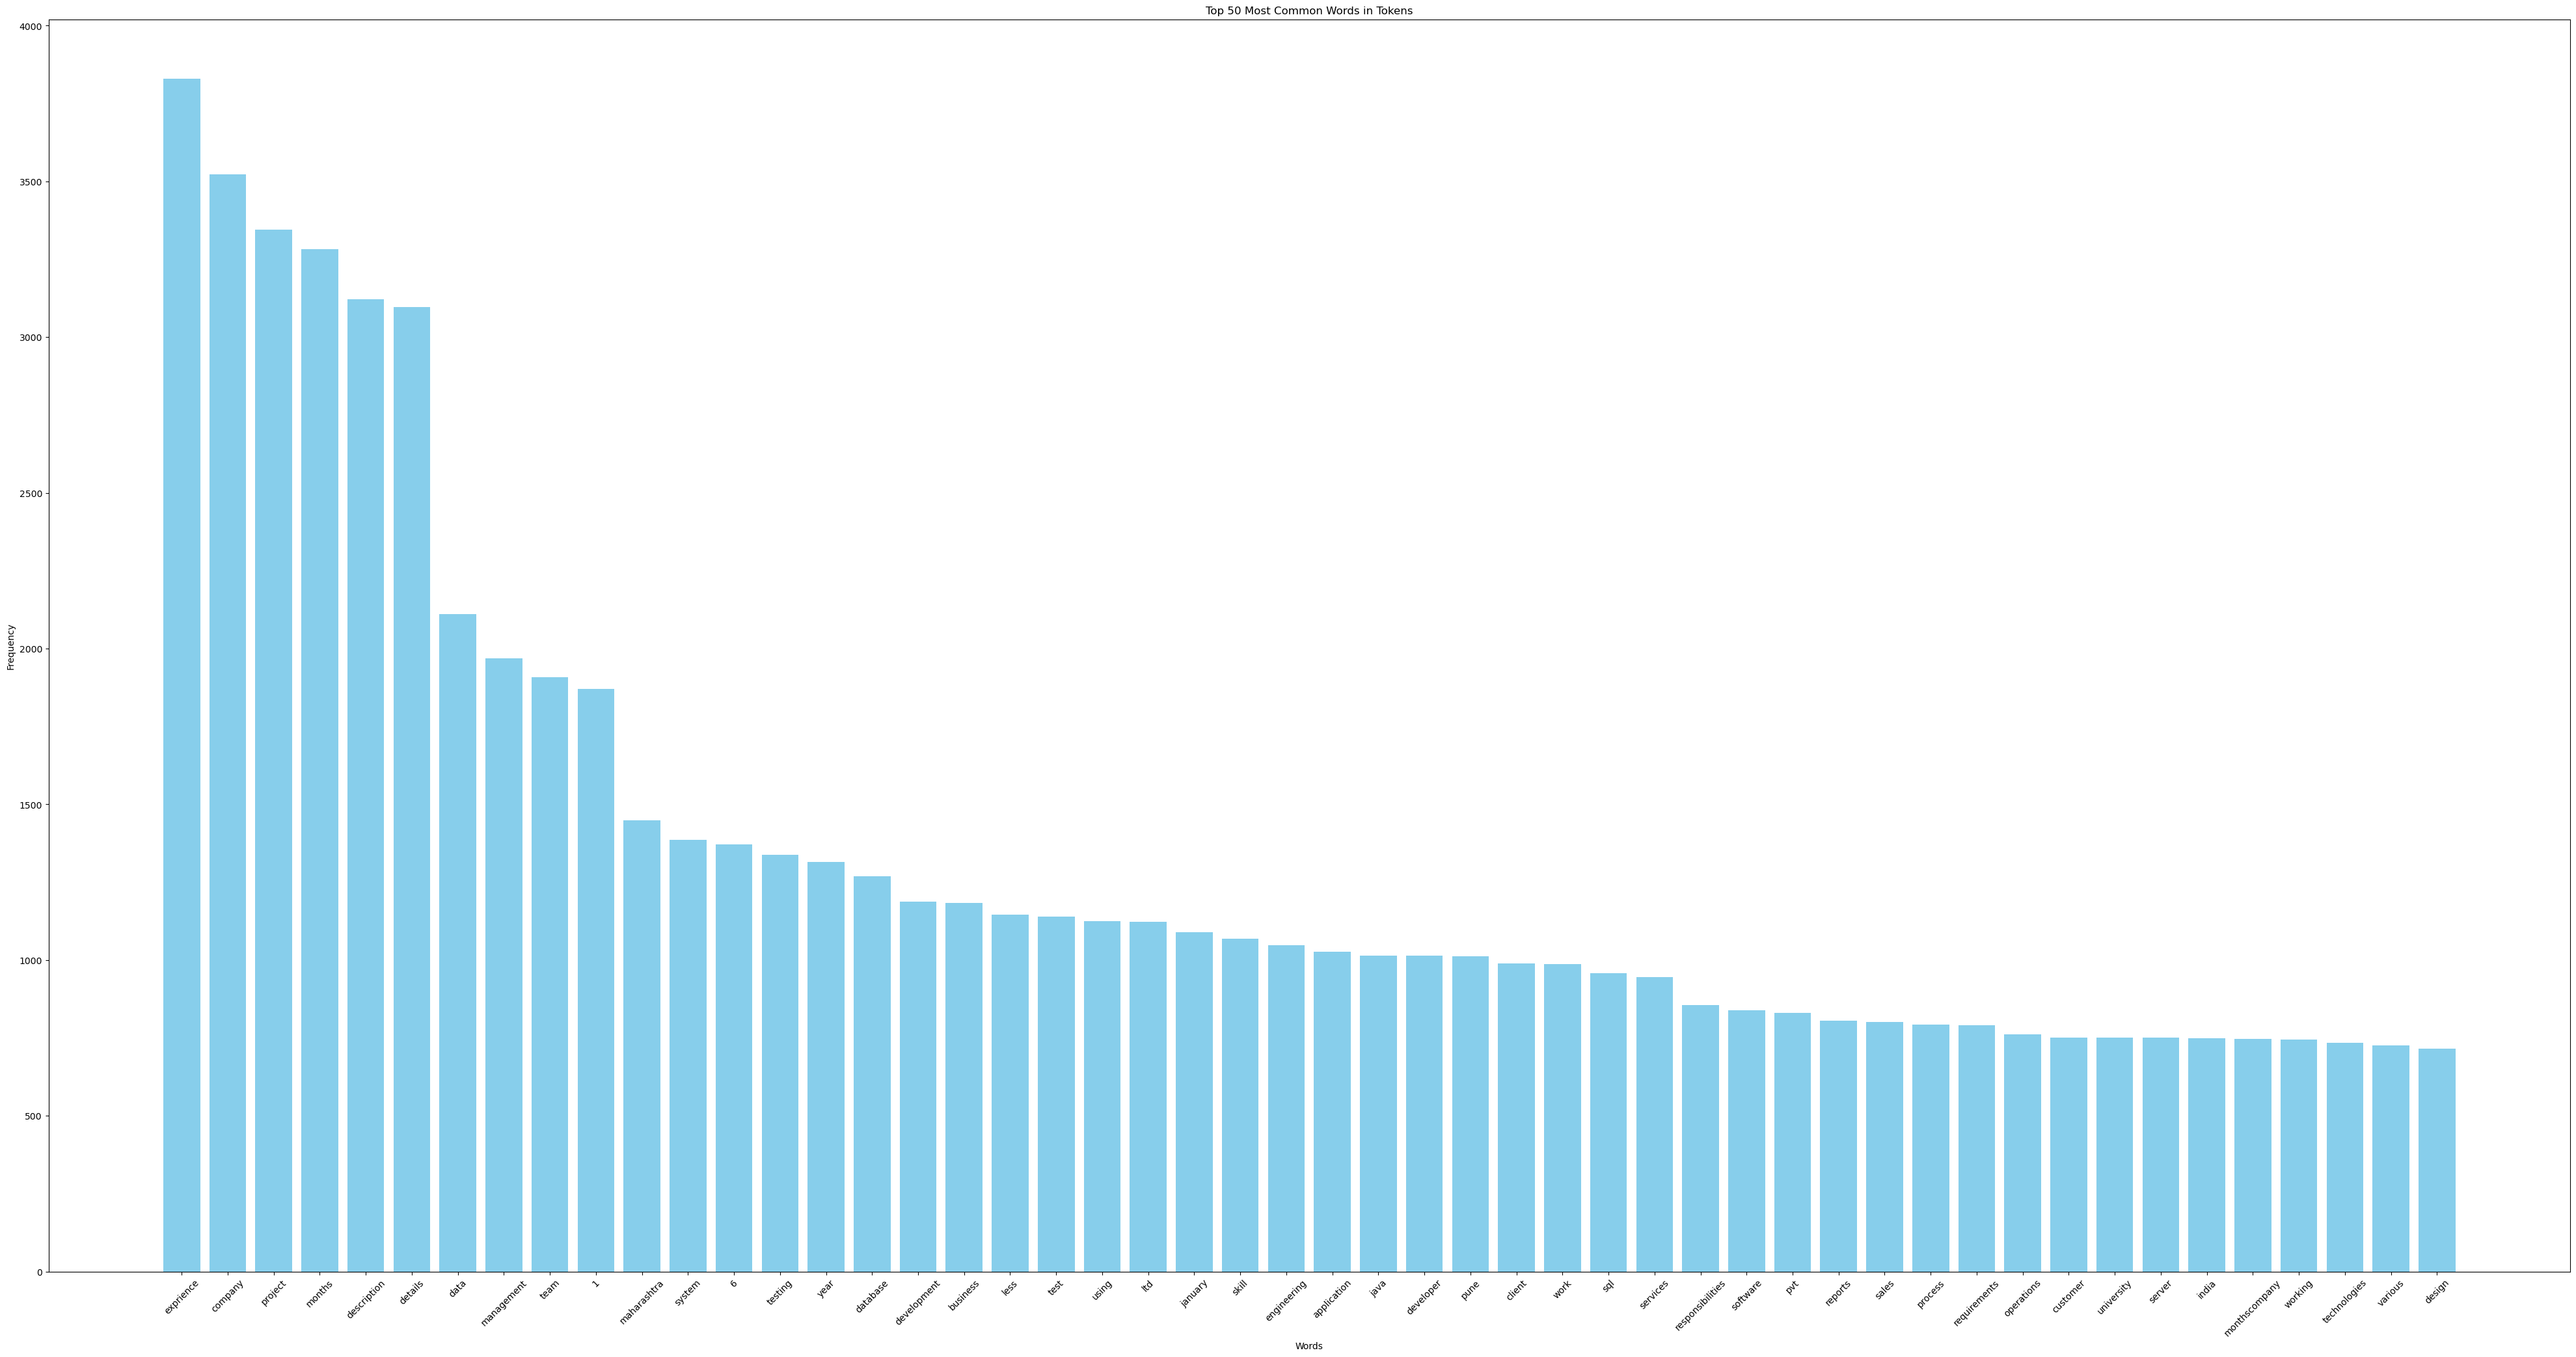

In [22]:
from collections import Counter

def visualize_word_distribution(tokens, n=100):
    # Count the frequency of each word
    word_counts = Counter(tokens)
    
    # Get the n most common words
    common_words = word_counts.most_common(n)
    
    # Separate words and their counts for plotting
    words, counts = zip(*common_words)
    
    # Plot the bar chart
    plt.figure(figsize=(50, 25))
    plt.bar(words, counts, color='skyblue')
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title(f"Top {n} Most Common Words in Tokens")
    plt.xticks(rotation=45)
    plt.show()

#visualize the top n words
visualize_word_distribution(resume_tokens, n=50)


In [23]:
word = Counter(resume_tokens)
print(len(word))
print(word)

8158
Counter({'exprience': 3829, 'company': 3522, 'project': 3345, 'months': 3283, 'description': 3122, 'details': 3096, 'data': 2111, 'management': 1969, 'team': 1908, '1': 1871, 'maharashtra': 1449, 'system': 1385, '6': 1371, 'testing': 1339, 'year': 1316, 'database': 1270, 'development': 1187, 'business': 1183, 'less': 1145, 'test': 1140, 'using': 1124, 'ltd': 1122, 'january': 1090, 'skill': 1069, 'engineering': 1047, 'application': 1026, 'java': 1015, 'developer': 1015, 'pune': 1013, 'client': 989, 'work': 987, 'sql': 957, 'services': 946, 'responsibilities': 856, 'software': 839, 'pvt': 831, 'reports': 806, 'sales': 801, 'process': 792, 'requirements': 790, 'operations': 761, 'customer': 752, 'university': 751, 'server': 751, 'india': 750, 'monthscompany': 746, 'working': 745, 'technologies': 734, 'various': 727, 'design': 715, 'environment': 683, 'college': 675, 'web': 662, 'python': 650, 'automation': 645, 'like': 640, 'role': 624, 'engineer': 617, 'technical': 614, 'support': 6

In [24]:

# Create a DataFrame from the Counter dictionary
df = pd.DataFrame(word.items(), columns=['Word', 'Count'])

# Generate descriptive statistics
summary = df['Count'].describe()
print(summary)

count    8158.000000
mean       37.762197
std       137.086309
min         1.000000
25%         5.000000
50%        10.000000
75%        24.000000
max      3829.000000
Name: Count, dtype: float64


In [25]:
# Find the row with the maximum count
max_row = df[df['Count'] == df['Count'].max()]
print("Most Frequent Word(s):")
print(max_row)

# Find the row with the minimum count
min_row = df[df['Count'] == df['Count'].min()]
print("\nLeast Frequent Word(s):")
print(min_row)


Most Frequent Word(s):
         Word  Count
83  exprience   3829

Least Frequent Word(s):
                         Word  Count
1215         sciencetechnical      1
2459     competitioneducation      1
4343          clienteducation      1
4344             clientskills      1
5262      statisticseducation      1
...                       ...    ...
6726              academycore      1
6858  administrationtechnical      1
7292        strategyeducation      1
7576          411041technical      1
7862              nonehobbies      1

[197 rows x 2 columns]


In [26]:
print("sciencetechnical in tokens:", 'sciencetechnical' in resume_tokens)

sciencetechnical in tokens: True


In [27]:
! pip install spacy

In [28]:
# Lemmatise the tokens
import spacy

# Load the English language model
nlp = spacy.load('en_core_web_sm')
nlp.max_length = 10000000

# Join the words into a single string (spaCy processes entire texts)
doc = nlp(' '.join(resume_tokens))

# Extract lemmatized words
lemmatized_resume = [token.lemma_ for token in doc]

print("Original words:", resume_tokens[:15])
print("Lemmatized words:", lemmatized_resume[:15])

Original words: ['programming', 'languages', 'python', 'pandas', 'numpy', 'scipy', 'scikitlearn', 'matplotlib', 'sql', 'java', 'javascriptjquery', 'machine', 'learning', 'regression', 'svm']
Lemmatized words: ['programming', 'language', 'python', 'pandas', 'numpy', 'scipy', 'scikitlearn', 'matplotlib', 'sql', 'java', 'javascriptjquery', 'machine', 'learn', 'regression', 'svm']


In [29]:
text ="modelling"
doc=nlp(text)

for token in doc:
    print(f"Word: {token.text}, Lemma: {token.lemma_}")

Word: modelling, Lemma: model


In [30]:
text ="visualisation"
doc=nlp(text)

for token in doc:
    print(f"Word: {token.text}, Lemma: {token.lemma_}")

Word: visualisation, Lemma: visualisation


### Job

In [31]:
jobs = ""

for job in job['cleaned_job']:
    jobs += job

In [32]:
len(jobs)

4360147

In [33]:
job_tokens = word_tokenize(jobs)
job_tokens

['we',
 'are',
 'looking',
 'for',
 'hire',
 'experts',
 'flutter',
 'developer',
 'so',
 'you',
 'are',
 'eligible',
 'this',
 'post',
 'then',
 'apply',
 'your',
 'resume',
 'job',
 'types',
 'fulltime',
 'parttime',
 'salary',
 '2000000',
 '4000000',
 'per',
 'month',
 'benefits',
 'flexible',
 'schedule',
 'food',
 'allowance',
 'schedule',
 'day',
 'shift',
 'supplemental',
 'pay',
 'joining',
 'bonus',
 'overtime',
 'pay',
 'experience',
 'total',
 'work',
 '1',
 'year',
 'preferred',
 'housing',
 'rent',
 'subsidy',
 'yes',
 'industry',
 'software',
 'development',
 'work',
 'remotely',
 'temporarily',
 'due',
 'to',
 'covid19pythondjango',
 'developerlead',
 'job',
 'codepdj',
 '04',
 'strong',
 'python',
 'experience',
 'in',
 'api',
 'development',
 'restrpc',
 'experience',
 'working',
 'with',
 'api',
 'frameworks',
 'djangoflask',
 'experience',
 'evaluating',
 'and',
 'improving',
 'the',
 'efficiency',
 'of',
 'programs',
 'in',
 'a',
 'linux',
 'environment',
 'ability'

In [34]:
len(job_tokens)

612216

In [35]:
job_tokens = [word for word in job_tokens if word not in stop_words]
job_tokens[:15]

['looking',
 'hire',
 'experts',
 'flutter',
 'developer',
 'eligible',
 'post',
 'types',
 'fulltime',
 'parttime',
 'salary',
 '2000000',
 '4000000',
 'per',
 'month']

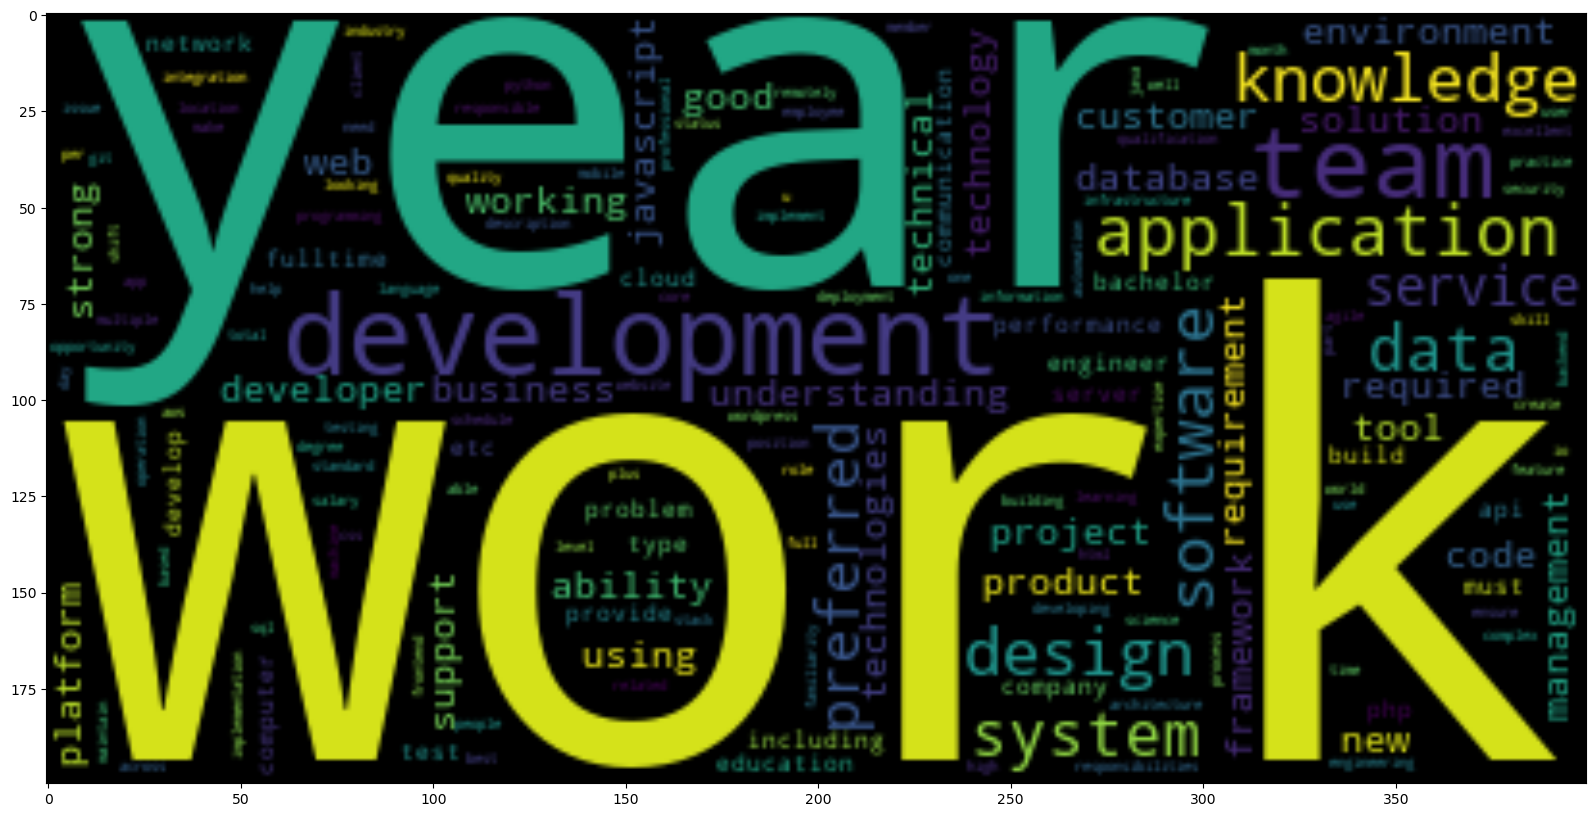

In [36]:
from wordcloud import WordCloud
wordcloudimage = WordCloud( font_step=2 ,
max_font_size=500,
collocations = False,

collocation_threshold = 1
).generate(" ".join(job_tokens))
plt.figure(figsize=(25, 10))
plt.imshow(wordcloudimage, interpolation='bilinear')
# plt.axis("off")
plt.show()

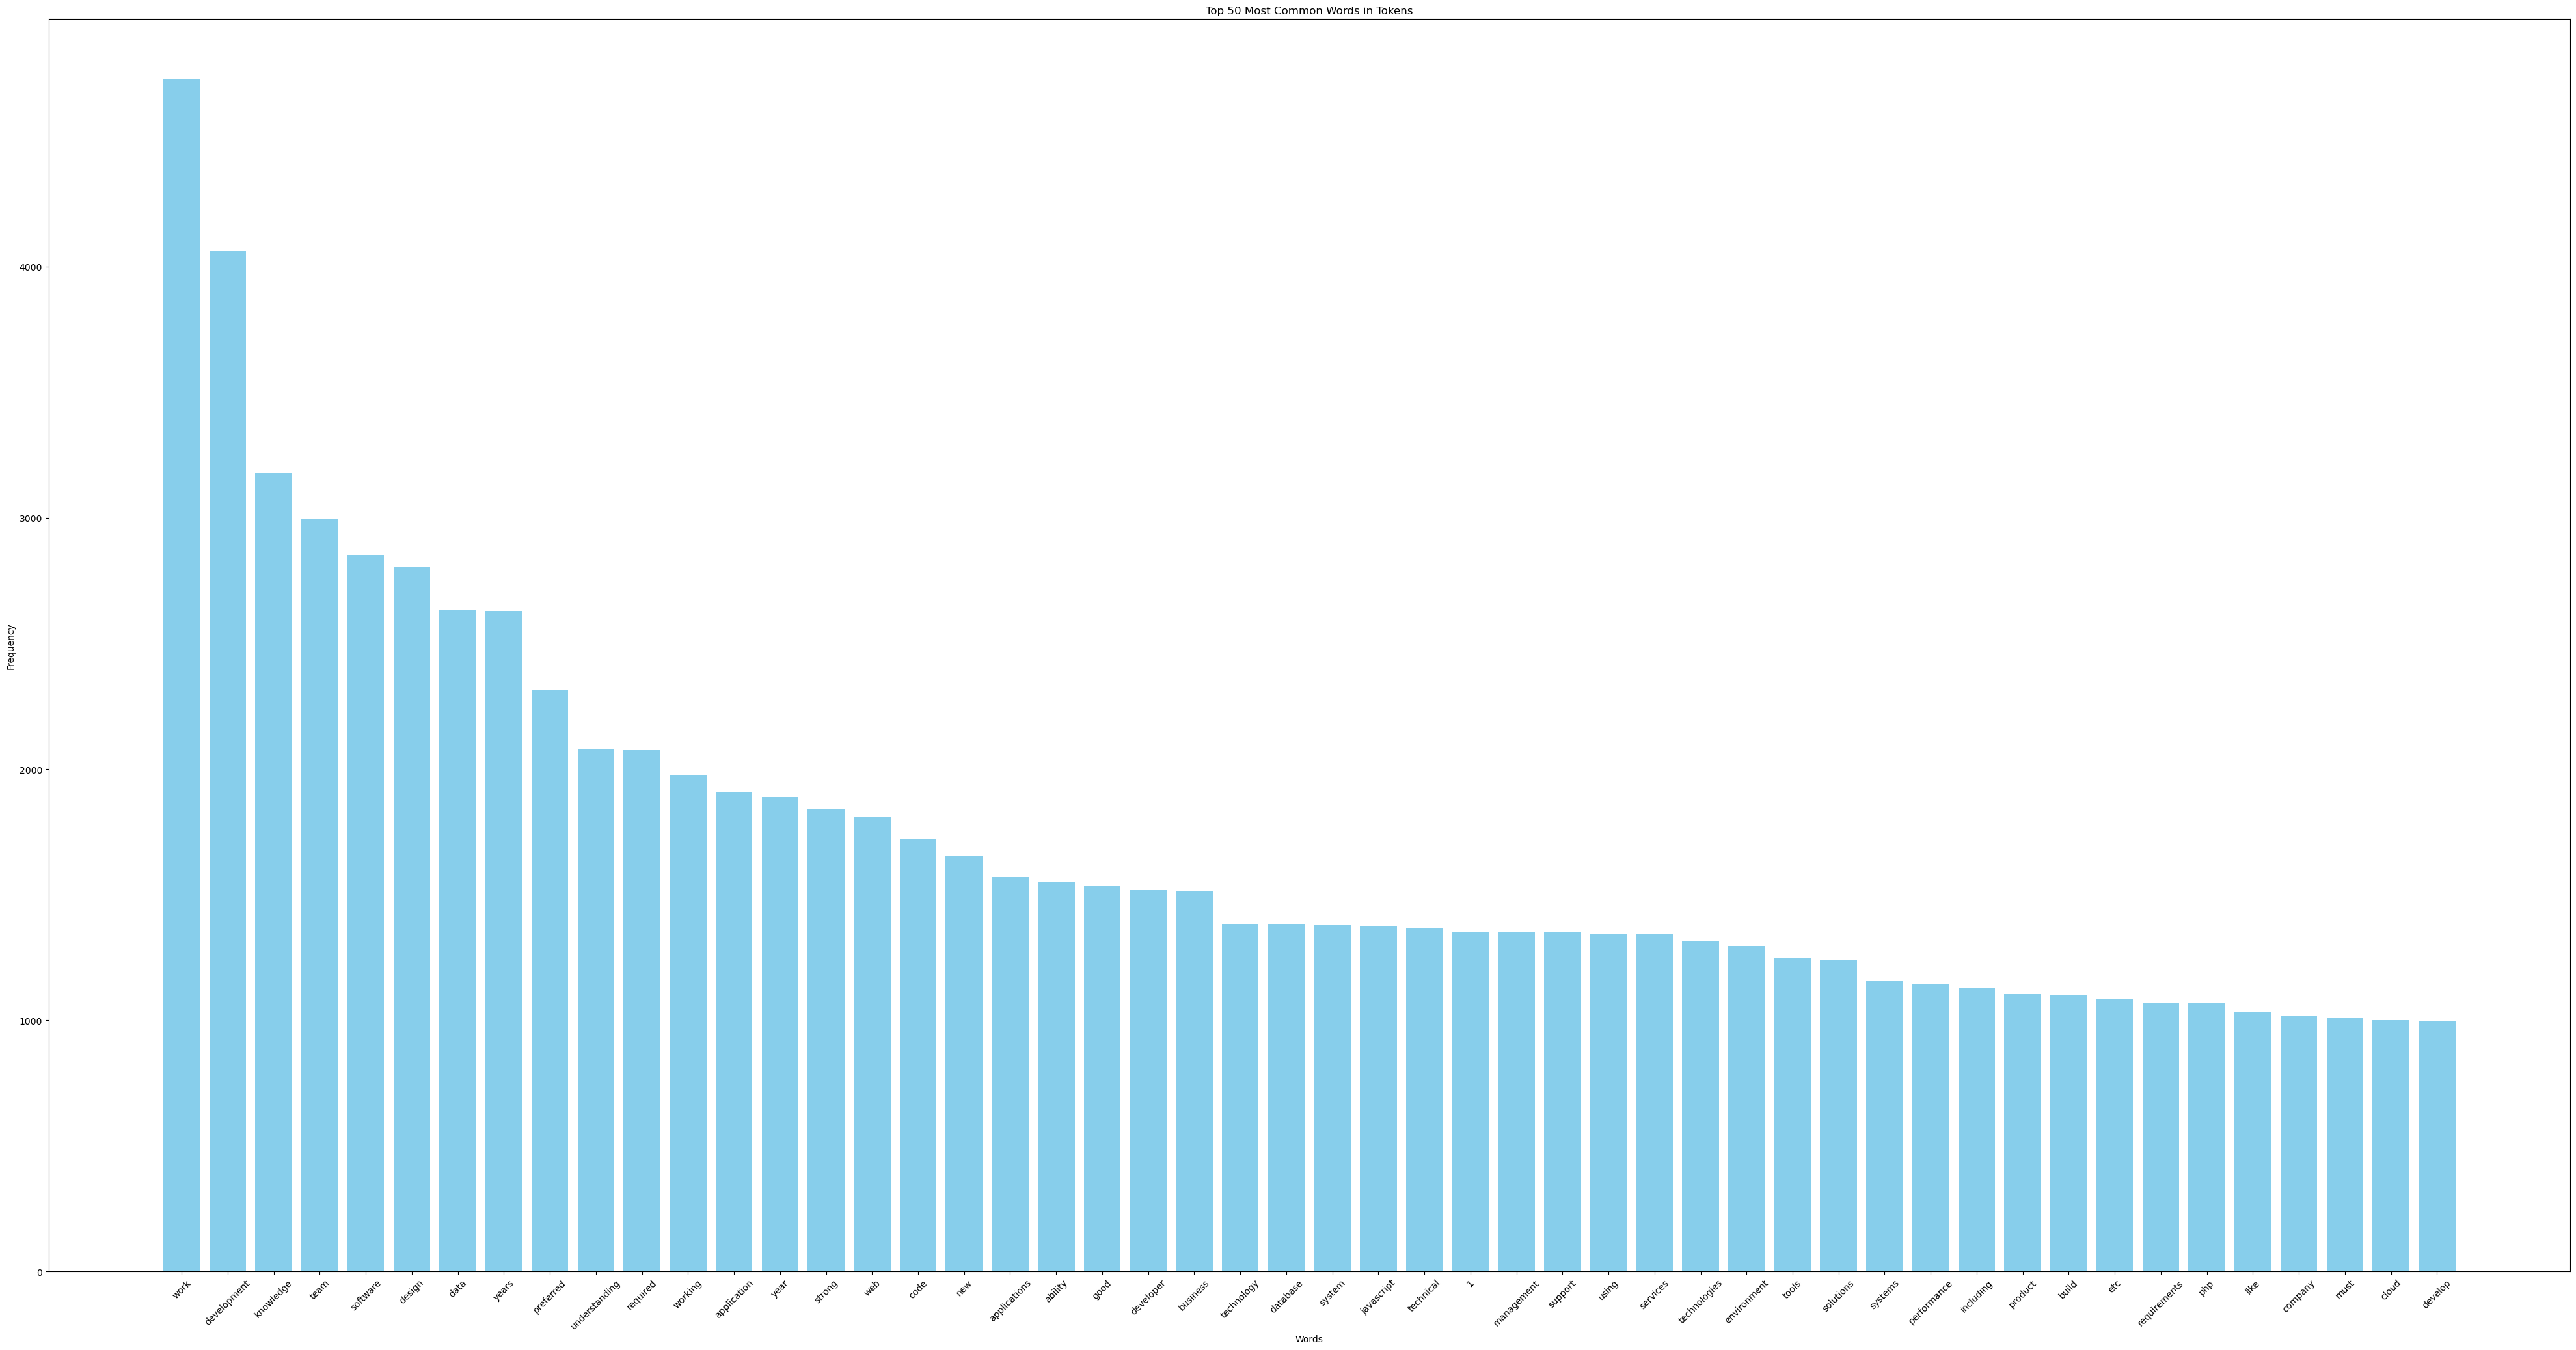

In [37]:
visualize_word_distribution(job_tokens, n=50)

In [38]:
word = Counter(job_tokens)
print(word)

Counter({'work': 4748, 'development': 4063, 'knowledge': 3178, 'team': 2994, 'software': 2852, 'design': 2806, 'data': 2634, 'years': 2629, 'preferred': 2314, 'understanding': 2079, 'required': 2075, 'working': 1977, 'application': 1908, 'year': 1890, 'strong': 1841, 'web': 1809, 'code': 1723, 'new': 1657, 'applications': 1571, 'ability': 1551, 'good': 1534, 'developer': 1519, 'business': 1515, 'technology': 1385, 'database': 1383, 'system': 1380, 'javascript': 1373, 'technical': 1366, '1': 1352, 'management': 1352, 'support': 1350, 'using': 1345, 'services': 1345, 'technologies': 1315, 'environment': 1297, 'tools': 1249, 'solutions': 1239, 'systems': 1155, 'performance': 1145, 'including': 1131, 'product': 1104, 'build': 1098, 'etc': 1086, 'requirements': 1069, 'php': 1067, 'like': 1035, 'company': 1019, 'must': 1009, 'cloud': 1001, 'develop': 996, 'education': 982, 'fulltime': 964, 'project': 957, 'communication': 951, 'responsibilities': 941, 'looking': 930, 'programming': 929, 'sal

In [39]:
df = pd.DataFrame(word.items(), columns=['Word', 'Count'])

# Generate descriptive statistics
summary = df['Count'].describe()
print(summary)

count    22374.000000
mean        19.641950
std        108.430471
min          1.000000
25%          1.000000
50%          2.000000
75%          6.000000
max       4748.000000
Name: Count, dtype: float64


In [40]:
# Find the row with the maximum count
max_row = df[df['Count'] == df['Count'].max()]
print("Most Frequent Word(s):")
print(max_row)

# Find the row with the minimum count
min_row = df[df['Count'] == df['Count'].min()]
print("\nLeast Frequent Word(s):")
print(min_row)

Most Frequent Word(s):
    Word  Count
28  work   4748

Least Frequent Word(s):
                      Word  Count
42     covid19pythondjango      1
43           developerlead      1
44                 codepdj      1
49                 restrpc      1
80              pyunitdata      1
...                    ...    ...
22369                  205      1
22370      wwwtheecsinccom      1
22371     twitterecsleslie      1
22372              hindman      1
22373           auctioneer      1

[10979 rows x 2 columns]


In [41]:
# Join the words into a single string (spaCy processes entire texts)
doc = nlp(' '.join(job_tokens))

# Extract lemmatized words
lemmatized_job = [token.lemma_ for token in doc]

print("Original words:", job_tokens[:15])
print("Lemmatized words:", lemmatized_job[:15])

Original words: ['looking', 'hire', 'experts', 'flutter', 'developer', 'eligible', 'post', 'types', 'fulltime', 'parttime', 'salary', '2000000', '4000000', 'per', 'month']
Lemmatized words: ['look', 'hire', 'expert', 'flutter', 'developer', 'eligible', 'post', 'type', 'fulltime', 'parttime', 'salary', '2000000', '4000000', 'per', 'month']


In [47]:
print(type(job_tokens), type(lemmatized_job))

<class 'list'> <class 'list'>


#### Vectorise the words

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Convert the single lemmatized string into a list of strings (required by the vectorizer)
tfidf_matrix = vectorizer.fit_transform(lemmatized_job)

# Convert to dense format and display it as a DataFrame for readability
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Print the resulting TF-IDF matrix
print(df_tfidf)

        000  000000  000200  000300  0005000  001  001000  001100  001200  \
0       0.0     0.0     0.0     0.0      0.0  0.0     0.0     0.0     0.0   
1       0.0     0.0     0.0     0.0      0.0  0.0     0.0     0.0     0.0   
2       0.0     0.0     0.0     0.0      0.0  0.0     0.0     0.0     0.0   
3       0.0     0.0     0.0     0.0      0.0  0.0     0.0     0.0     0.0   
4       0.0     0.0     0.0     0.0      0.0  0.0     0.0     0.0     0.0   
...     ...     ...     ...     ...      ...  ...     ...     ...     ...   
441160  0.0     0.0     0.0     0.0      0.0  0.0     0.0     0.0     0.0   
441161  0.0     0.0     0.0     0.0      0.0  0.0     0.0     0.0     0.0   
441162  0.0     0.0     0.0     0.0      0.0  0.0     0.0     0.0     0.0   
441163  0.0     0.0     0.0     0.0      0.0  0.0     0.0     0.0     0.0   
441164  0.0     0.0     0.0     0.0      0.0  0.0     0.0     0.0     0.0   

        001400  ...   zr  zrjob   zs  zscaler  zscalercom  zuan  zuckerberg

In [44]:
# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

print("Feature names:", feature_names)

Feature names: ['000' '000000' '000200' ... 'zurich' 'zwave' 'zynga']


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample list of text documents
texts = ["this is a sample", "another sample text", "text processing example"]

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the texts
X = vectorizer.fit_transform(texts)

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

print("Feature names:", feature_names)

Feature names: ['another' 'example' 'is' 'processing' 'sample' 'text' 'this']


In [46]:
df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Print the resulting TF-IDF matrix
print(df_tfidf)

    another   example        is  processing    sample      text      this
0  0.000000  0.000000  0.622766    0.000000  0.473630  0.000000  0.622766
1  0.680919  0.000000  0.000000    0.000000  0.517856  0.517856  0.000000
2  0.000000  0.622766  0.000000    0.622766  0.000000  0.473630  0.000000
